In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')

In [ ]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [ ]:
df.shape

(2787, 6)

In [ ]:
#parse data based on dates
df=pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'],index_col=['Date'])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.shape

(2787, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.columns

Index(['Currency', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)'],
      dtype='object')

In [ ]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df_price=pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
df_price


,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0, 0.5, 'BTC Price')

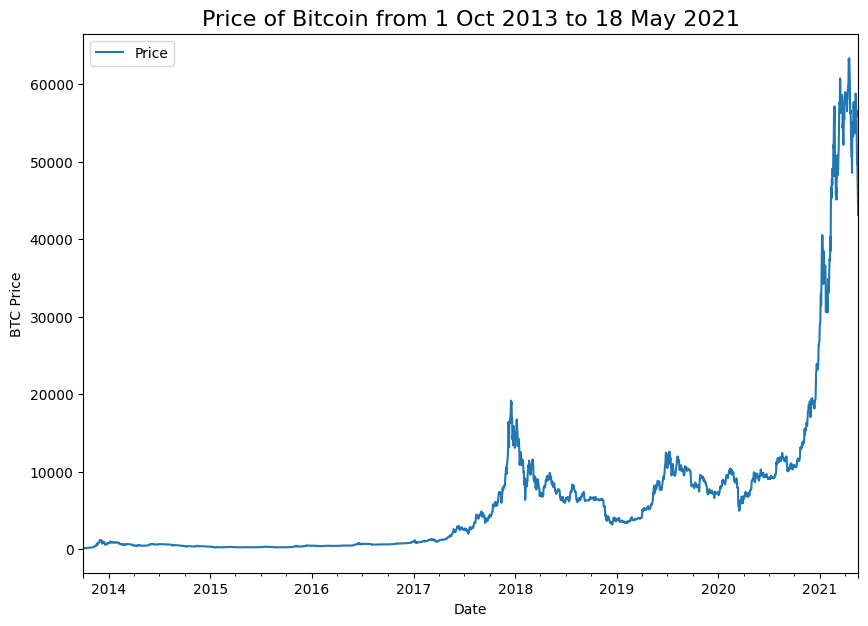

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series
df_price.plot(figsize=(10,7))
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021',fontsize=16)
plt.xlabel('Date')
plt.ylabel('BTC Price')

**Split Data**
**Because Time series data depend on timesteps, So we need to create the data based on the timesteps**

In [ ]:
#change the data into array
time_step=df_price.index.to_numpy()
price=df_price['Price'].values.astype('float32')
time_step[:10],price[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116], dtype=float32))

In [ ]:
split_size=int(0.8*len(price))
print(split_size)

2229


In [ ]:
train_time,train_price=time_step[:split_size],price[:split_size]
test_time,test_price=time_step[split_size:],price[split_size:]
len(train_time),len(test_time),len(train_price),len(test_price)

(2229, 558, 2229, 558)

In [ ]:
train_time[0:10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
       '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

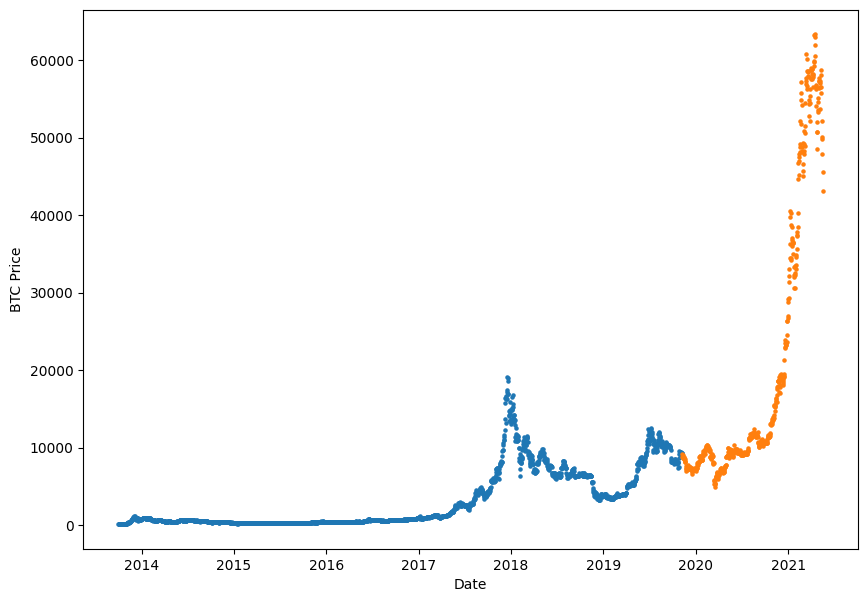

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(train_time, train_price, s=5, label="Train data")
plt.scatter(test_time, test_price, s=5, label="Test data")
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.show()

**Training using GRU approach**

In [ ]:
#create feature of data
import torch
def create_dataset(dataset, step):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        step: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-step):
        feature = dataset[i:i+step] #contoh step 1, i=1: feature=1:2
        target = dataset[i+1:i+step+1]#contoh target= 2:3
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)


In [ ]:
step = 1
X_train, y_train = create_dataset(train_price, step=step)
X_test, y_test = create_dataset(test_price, step=step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


torch.Size([2228, 1]) torch.Size([2228, 1])
torch.Size([557, 1]) torch.Size([557, 1])


<ipython-input-19-8bf1d9979fee>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.tensor(X), torch.tensor(y)


In [ ]:
import torch.nn as nn
class SimpleGRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear1 = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.linear(x)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch.optim as optim
import torch.utils.data as data

model = SimpleGRU()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 200
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 4897.1768, test RMSE 26635.9258
Epoch 100: train RMSE 4219.6021, test RMSE 25779.1973
